In [81]:
import pickle
import os
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from scipy import spatial


In [41]:
data_path = '../../data/tfidf_svd/'

In [42]:
fandom_list = [i for i in os.listdir(data_path) if 'tsv' in i]

In [43]:
fandom_list

['star_wars_all_media_types_tfidf_svd.tsv',
 'kuroko_no_basuke_tfidf_svd.tsv',
 'the_avengers_all_media_types_tfidf_svd.tsv',
 'dcu_tfidf_svd.tsv',
 'sherlock_holmes_&_related_fandoms_tfidf_svd.tsv',
 'bishoujo_senshi_sailor_moon_tfidf_svd.tsv',
 'hamilton_miranda_tfidf_svd.tsv',
 'arthurian_mythology_&_related_fandoms_tfidf_svd.tsv',
 'doctor_who_&_related_fandoms_tfidf_svd.tsv',
 'les_miserables_all_media_types_tfidf_svd.tsv',
 'shakespare_william_works_tfidf_svd.tsv',
 'naruto_tfidf_svd.tsv',
 'harry_potter_tfidf_svd.tsv',
 'haikyuu_tfidf_svd.tsv',
 'tolkien_j_r_r_works_&_related_fandoms_tfidf_svd.tsv',
 'the_walking_dead_&_related_fandoms_tfidf_svd.tsv',
 'homestuck_tfidf_svd.tsv',
 'marvel_tfidf_svd.tsv',
 'attack_on_titan_tfidf_svd.tsv',
 'dragon_age_all_media_types_tfidf_svd.tsv',
 'one_direction_tfidf_svd.tsv',
 'ms_paint_adventures_tfidf_svd.tsv',
 'buffy_the_vampire_slayer_tfidf_svd.tsv',
 'supernatural_tfidf_svd.tsv',
 'hetalia_axis_powers_tfidf_svd.tsv']

/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


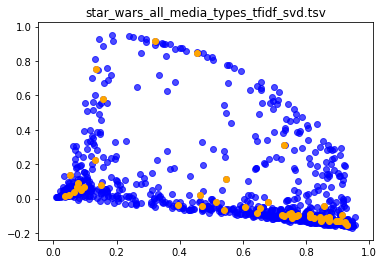

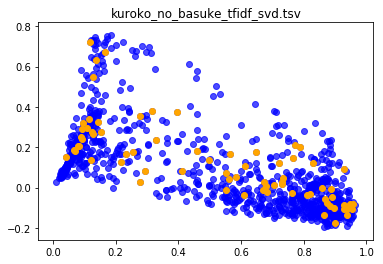

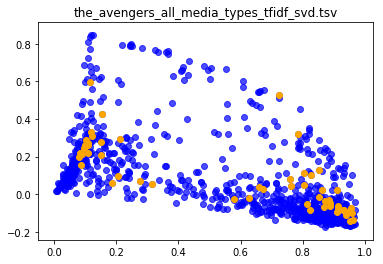

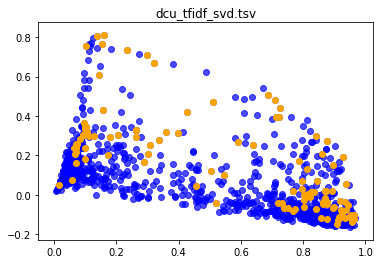

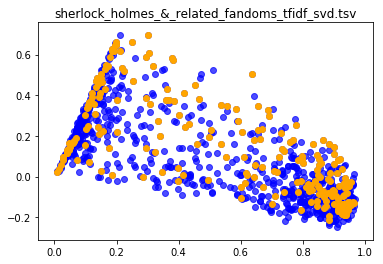

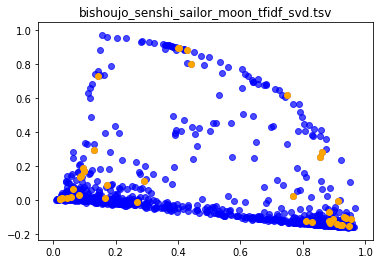

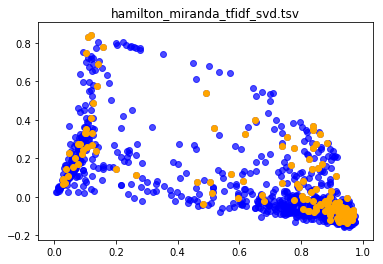

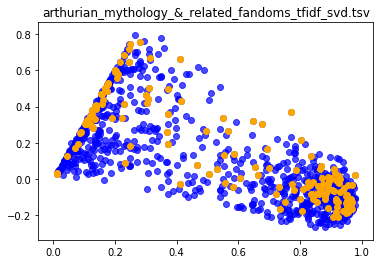

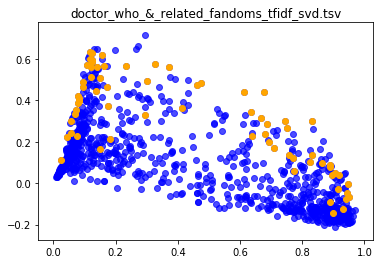

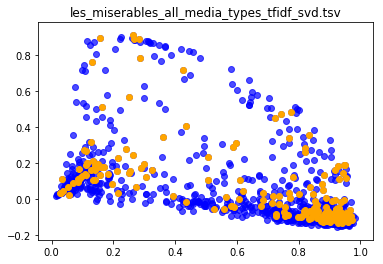

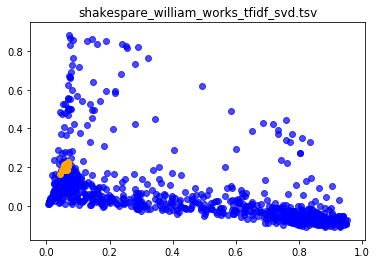

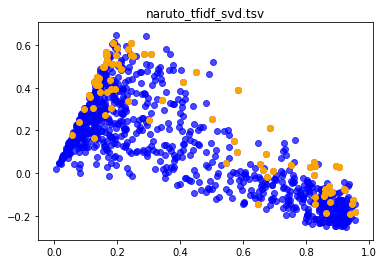

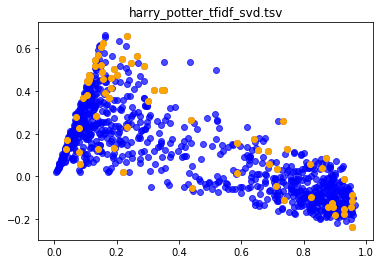

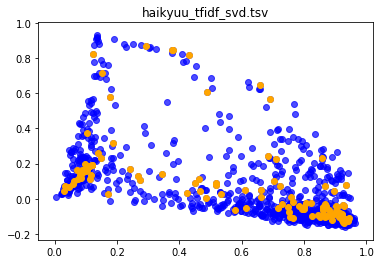

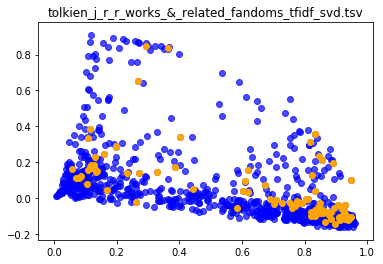

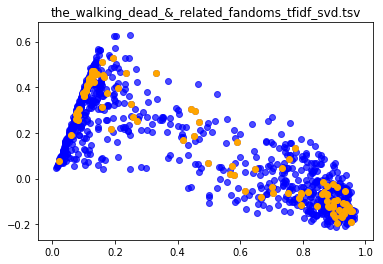

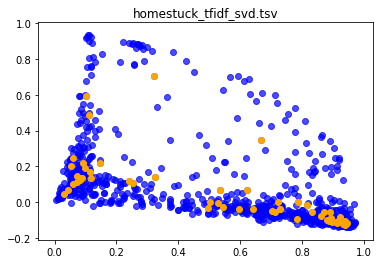

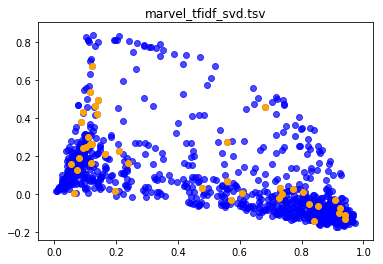

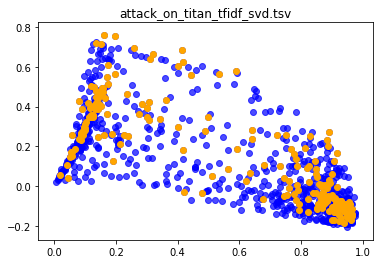

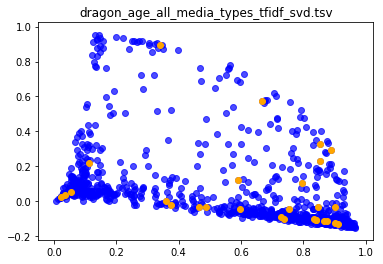

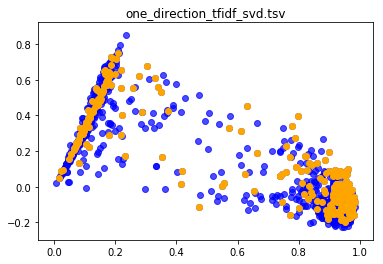

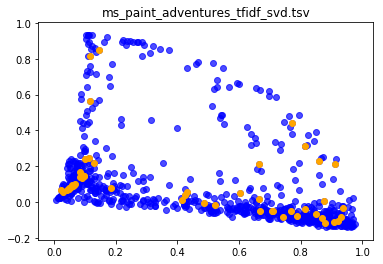

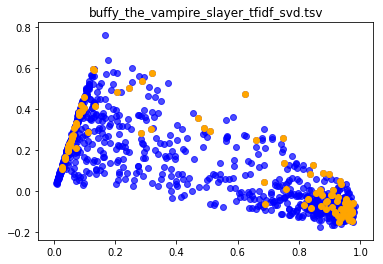

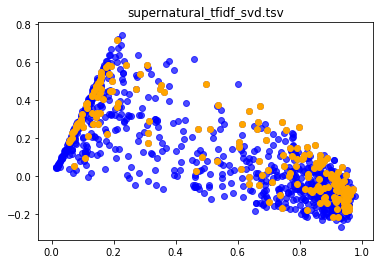

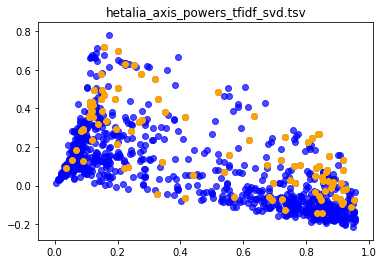

In [93]:
for i,fandom in enumerate(fandom_list):
    df = pd.read_csv(os.path.join(data_path,fandom), sep = '\t')
    top1 = df['Relationship'].value_counts().index[0]
    top2 = df['Relationship'].value_counts().index[1]

    plt.figure()
    df_t1 = df[df['Relationship'] == top1]
    df_t2 = df[df['Relationship'] == top2]
#     plt.scatter(df_t2['pc1'], df_t2['pc2'])
    plt.scatter(df['pc1'], df['pc2'],alpha=0.7,c='blue')
    plt.scatter(df_t1['pc1'], df_t1['pc2'],c='orange')

    plt.title(fandom)


In [89]:
def find_close(vec, df):
    min_dist = (0,1)
    for row in df.iterrows():
        row_vec = [row[1]['pc1'], row[1]['pc2']]
        if vec != row_vec:
            if spatial.distance.cosine(vec,row_vec) < min_dist[1]:
                min_dist = (row[0], spatial.distance.cosine(vec,row_vec))
    return min_dist

In [107]:
df.columns.values

array(['index', 'AdditionalTags', 'ArchiveWarnings', 'Author',
       'Bookmarks', 'Category', 'ChapterIndex', 'Chapters', 'Characters',
       'Comments', 'CompleteDate', 'Fandoms', 'Hits', 'Kudos', 'Language',
       'Notes', 'PublishDate', 'Rating', 'Relationship', 'Summary',
       'Title', 'URL', 'UpdateDate', 'Words', 'pc1', 'pc2', 'closest'],
      dtype=object)

/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


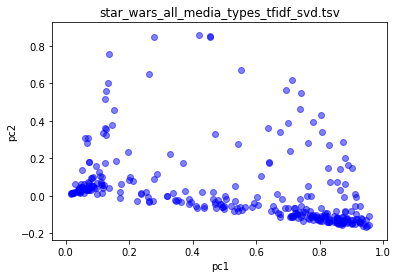

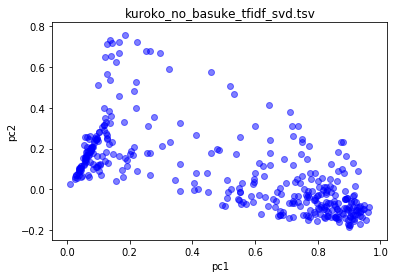

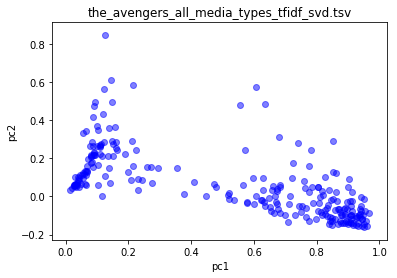

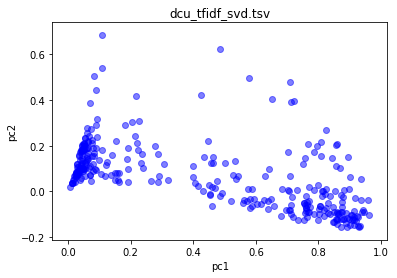

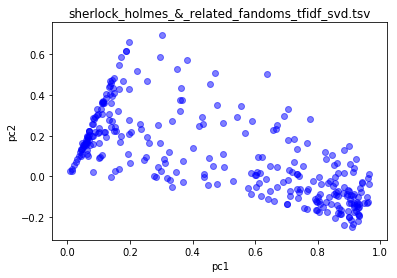

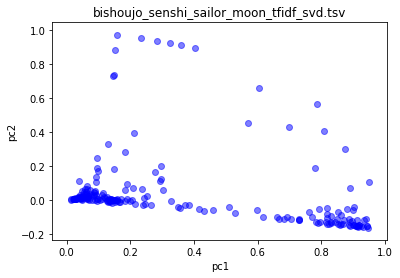

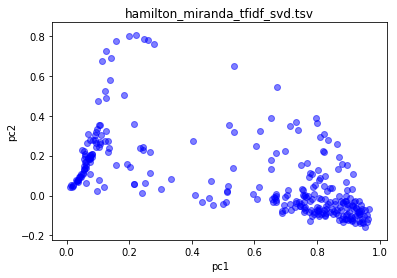

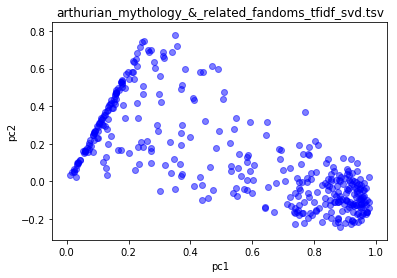

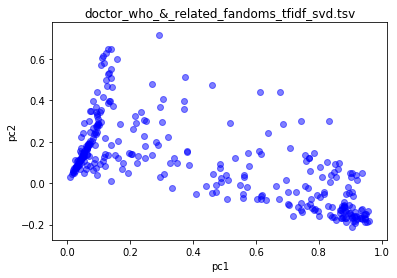

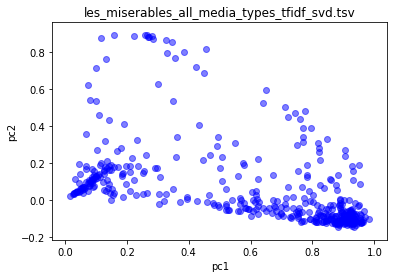

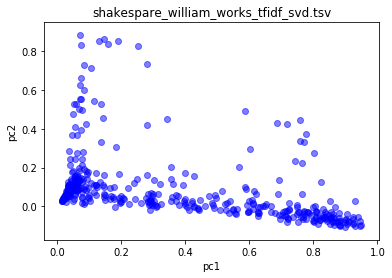

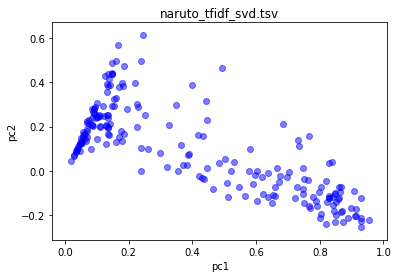

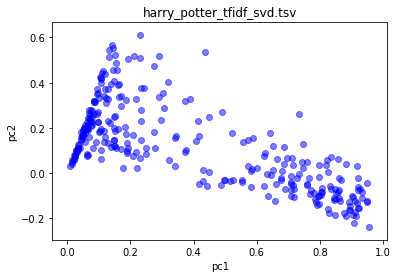

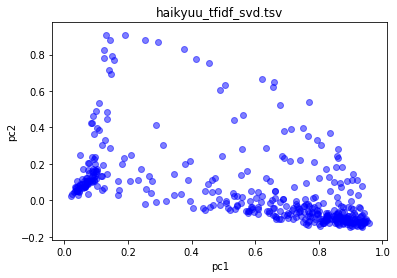

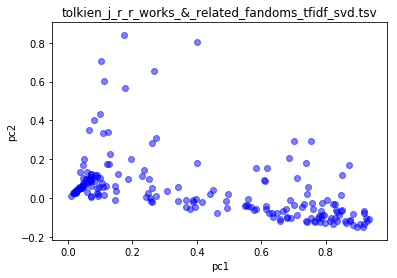

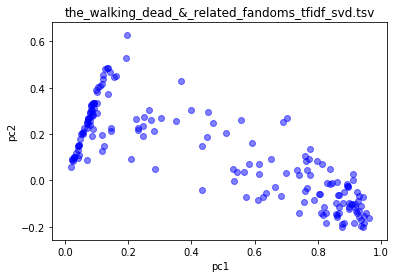

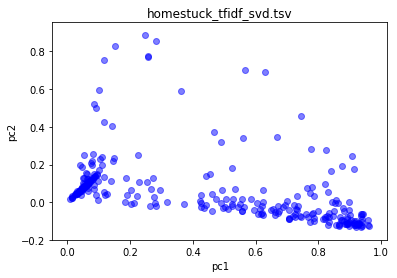

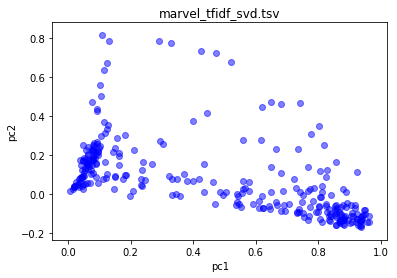

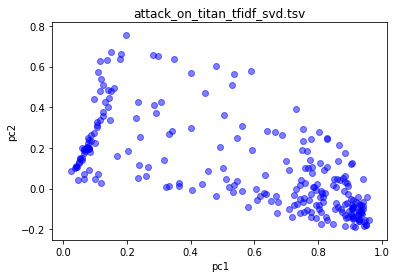

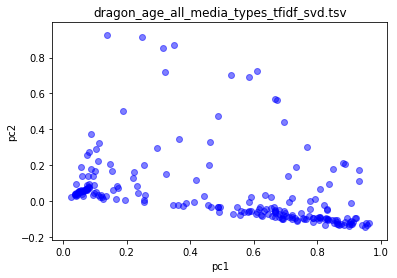

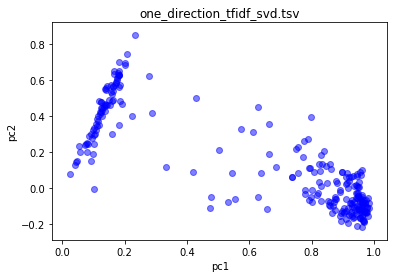

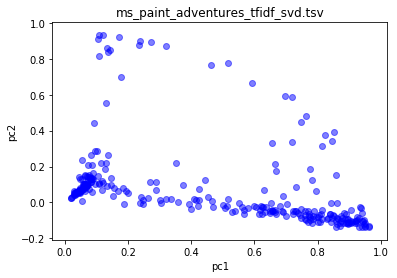

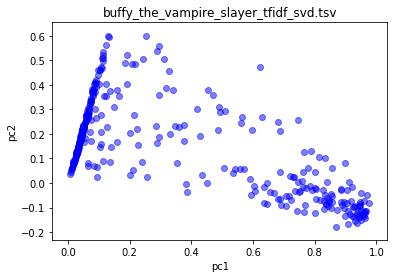

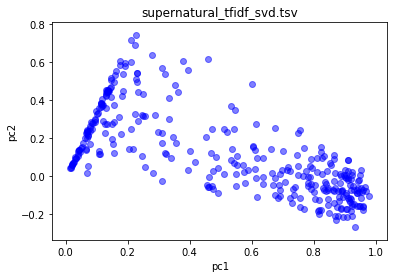

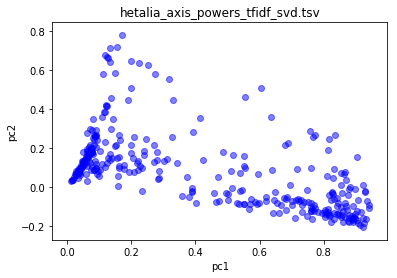

In [115]:
for i,fandom in enumerate(fandom_list):
    df = pd.read_csv(os.path.join(data_path,fandom), sep = '\t')
    df = df[df.Chapters == 1]
    top_len = int(len(df)/2)
    df_top = df.sort_values('Words').head(top_len)

    plt.figure()
    plt.scatter(df['pc1'], df['pc2'],alpha=0.5,c='blue')
    plt.xlabel('pc1')
    plt.ylabel('pc2')
#     plt.scatter(df_top['pc1'], df_top['pc2'],c='orange')

    plt.title(fandom)


In [94]:
df['closest'] = df.apply(lambda row: find_close([row['pc1'], row['pc2']], df), axis=1 )

In [95]:
df

,index,AdditionalTags,ArchiveWarnings,Author,Bookmarks,Category,ChapterIndex,Chapters,Characters,Comments,...,Rating,Relationship,Summary,Title,URL,UpdateDate,Words,pc1,pc2,closest
0,7295,"Self-Harm, Mental Health Issues, Magic Realism...",Creator Chose Not To Use Archive Warnings,prussium,25,M/MF/M,11.0,12,"America (Hetalia: Axis Powers), England (Hetal...",4,...,Explicit,"America (Hetalia)/England (Hetalia), Hungary (...",Arthur Kirkland aches to be someone else other...,Paint me to life,http://archiveofourown.org/works/918277/chapte...,2015-11-24,49421.0,0.873363,0.039417,"(719, 4.7562287941449455e-07)"
1,23298,"Drinking Games, Drinking & Talking, Historical...",No Archive Warnings Apply,newamsterdam,4,M/M,NaN,1,"Denmark (Hetalia: Axis Powers), Netherlands (H...",8,...,Teen And Up Audiences,Denmark (Hetalia)/Netherlands (Hetalia),Nederland has almost forgotten the reason he k...,"If the City Never Sleeps, Then That Makes Two",http://archiveofourown.org/works/2845796,NaN,3257.0,0.923112,-0.204486,"(423, 6.524140392372146e-07)"
2,34724,NaN,Creator Chose Not To Use Archive Warnings,Erosempai,0,M/M,NaN,1,"Poland, Italy - Character",0,...,Explicit,Poland/Italy,Poland wants his territory back...,Reclaiming You,http://archiveofourown.org/works/381379?view_a...,NaN,789.0,0.045419,0.103939,"(311, 1.8068562412931755e-07)"
3,23545,Italian Mafia,No Archive Warnings Apply,terradog13,0,M/M,8.0,10,NaN,0,...,Mature,Germany (Hetalia)/North Italy (Hetalia),Ludwig is is just an ordinary businessman when...,Change Isn\'t Always a Bad Thing,http://archiveofourown.org/works/2443868/chapt...,2014-10-12,8010.0,0.608852,-0.050261,"(352, 4.7350288356895476e-08)"
4,3648,"Hurt/Comfort, Romance, Mpreg, Past Miscarriage...",No Archive Warnings Apply,kartashyov,3,M/M,NaN,1,"Spain (Hetalia: Axis Powers), South Italy (Het...",3,...,Teen And Up Audiences,"South Italy (Hetalia)/Spain (Hetalia), Germany...","The seasons change, and so does Lovino. With t...",Just Have Hope,http://archiveofourown.org/works/5914333,NaN,8305.0,0.759928,-0.081656,"(573, 8.94470553181037e-09)"
5,27059,"Alternate Universe, Demons, Hell, Religious Co...","Graphic Depictions Of Violence, Rape/Non-Con, ...",Klei,23,M/M,7.0,10,"Russia (Hetalia: Axis Powers), America (Hetali...",2,...,Explicit,"America (Hetalia)/Russia (Hetalia), England (H...",Ivan decides to summon a demon to take his rev...,The Book of Hell,http://archiveofourown.org/works/790771/chapte...,2014-08-29,69099.0,0.940950,-0.097088,"(788, 2.9214280994338537e-09)"
6,35938,"Dom/sub, beginning of relationship, Bondage an...",Creator Chose Not To Use Archive Warnings,CloudedAbandon,1,M/M,3.0,4,"Canada (Hetalia: Axis Powers), England (Hetali...",0,...,Mature,"Canada (Hetalia)/England (Hetalia), England (H...",Matthew wants a D/s relationship with Arthur. ...,Take Me Down,http://archiveofourown.org/works/370069/chapte...,2012-03-27,3236.0,0.518213,0.079129,"(945, 6.14102320917187e-06)"
7,36870,"Dark, Smut, Non-Penetrative Sex, Marking, Stuf...",Rape/Non-Con,drcalvin,1,Multi,3.0,7,"France (Hetalia: Axis Powers), Spain (Hetalia:...",0,...,Mature,"Belarus (Hetalia)/Russia (Hetalia), Prussia (H...","Drabbles and short ficlets, originally posted ...",Hetalia drabble collection 3 - The dark ones,http://archiveofourown.org/works/55360/chapter...,NaN,2848.0,0.034013,0.078368,"(323, 4.629411631817959e-08)"
8,6363,NaN,Creator Chose Not To Use Archive Warnings,MoonSpark5996,0,NaN,4.0,7,"Canada - Character, America - Character, Reade...",0,...,General Audiences,"Canada x Reader, America x Reader, Canada x Re...","This is my first story on here, and I\'m reall...",Ghostly Love,http://archiveofourown.org/works/2167419/chapt...,2015-09-28,4316.0,0.048741,0.126616,"(825, 5.377213896373689e-09)"
9,30136,"human AU, Paint It White AU, I just want kisse...",Creator Chose Not To Use Archive Warnings,thetrueliesofafangirl,5,F/MM/M,NaN,1,"America (Hetalia: Axis Powers), Russia (Hetali...",2,...,Teen And Up Audiences,"Germany (Hetalia)/North Italy (He

In [105]:
df.iloc[2].URL

'http://archiveofourown.org/works/381379?view_adult=true'

In [106]:
df.iloc[311].URL

'http://archiveofourown.org/works/2211429/chapters/5530580'

In [29]:
df

,0,1,2
0,1,1,0
1,2,2,3


In [35]:
df = pd.DataFrame(svd)

In [36]:
df

,0,1
0,0.126075,0.557127
1,0.575919,0.265040
2,0.759621,-0.107734
3,0.309375,0.271195
4,0.140255,0.751234
5,0.822425,-0.133907
6,0.763457,-0.077281
7,0.777149,0.068953
8,0.083153,0.221825
9,0.751802,-0.017370


In [38]:
df.apply(lambda row: print(row.name), axis=1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

0      None
1      None
2      None
3      None
4      None
5      None
6      None
7      None
8      None
9      None
10     None
11     None
12     None
13     None
14     None
15     None
16     None
17     None
18     None
19     None
20     None
21     None
22     None
23     None
24     None
25     None
26     None
27     None
28     None
29     None
       ... 
970    None
971    None
972    None
973    None
974    None
975    None
976    None
977    None
978    None
979    None
980    None
981    None
982    None
983    None
984    None
985    None
986    None
987    None
988    None
989    None
990    None
991    None
992    None
993    None
994    None
995    None
996    None
997    None
998    None
999    None
Length: 1000, dtype: object